In [2]:
##using pd_np_plt_etc enviroment
import subprocess
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

##go to folder
os.chdir('/archive/mirzaa_g/exomes/result_files_0321/graphing_0321')

Setup Complete


In [ ]:
##got master ped tracking 031921, so import
exome_data = pd.read_excel("master_ped_tracking_120920.xlsx", 
                    sheet_name='Ped Tracking', index_col='family_id',
     engine='openpyxl')

# exome_data.head()
exome_data.shape

In [ ]:
##only use the families we want
exome_data_red = exome_data.loc[exome_data['dbd_include'] == 1]
exome_data_red.shape

In [ ]:
##ped types
ped_type_counts = exome_data_red.classification.value_counts()
print(ped_type_counts)


In [ ]:
##seaborn alt bar chart
plt.title('pedigree classifications - all', fontsize =16)
ped_type_counts = exome_data_red.classification.value_counts()
sns.barplot(y=ped_type_counts.index, x=ped_type_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("all_pedigree_types.barchart.pdf", bbox_inches="tight")

In [ ]:
##graph ped types, but combine some type... use apply
def new_ped_type(row):
    if row.classification == 'Trio*' or row.classification == 'Trio':
        return 'trio'
    elif row.classification == 'Singleton*' or row.classification == 'Singleton':
        return 'singleton'
    elif row.classification == 'Duo*' or row.classification == 'Duo':
        return 'duo'
    elif row.classification == 'Quad*' or row.classification == 'Quad':
        return 'quad'
    else:
        return 'other'

ped_types = exome_data_red.apply(new_ped_type, axis='columns')

ped_type_counts = ped_types.value_counts()

print(type(ped_type_counts))

##barchart
plt.title('pedigree classifications - reduced', fontsize =16)
sns.set(font_scale=1) 
sns.barplot(y=ped_type_counts.index, x=ped_type_counts, ci=None, palette="colorblind",orient='h' )
plt.savefig("reduced_pedigree_types.barchart.pdf", bbox_inches="tight")

In [ ]:
##ethniticties -- all the same within pedigree
# ped_type_counts = exome_data_red["Original ethnicity"].value_counts()
eth_type_counts = exome_data_red["NIH Ethnicity"].str.split(',').str[0].value_counts()
print(eth_type_counts)


In [ ]:
##seaborn alt bar chart
plt.title('ethnicity', fontsize =16)
sns.barplot(y=eth_type_counts.index, x=eth_type_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("ethnicity_types.barchart.pdf", bbox_inches="tight")

In [ ]:
##proband gender (just get first gender, may need to get all)
gender_counts = exome_data_red["Gender* "].str.split(',').str[0].value_counts()
print(gender_counts)

In [ ]:
##seaborn alt bar chart
plt.title('gender - proband', fontsize =16)
sns.barplot(y=gender_counts.index, x=gender_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("gender_proband.barchart.pdf", bbox_inches="tight")

In [ ]:
##proband sample type (just get first gender, may need to get all)
sample_counts = exome_data_red.proband_sample_type.str.split(',').str[0].str.split(' ').str[0].str.split('-').str[0].str.lower().value_counts()
print(sample_counts)

In [ ]:
##seaborn alt bar chart
plt.title('sample - proband', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("sample_type_proband.barchart.pdf", bbox_inches="tight")

# next attempts 0421

In [ ]:
##manually make tissue types i.e. get proband_sample_type column and replace , with \n
sample_info_file = 'sample_types_040521.txt'
si = pd.read_csv(sample_info_file, delimiter='\t')
sample_counts = si.proband_sample_type.str.split(' ').str[0].value_counts()
si.head()
sample_counts

In [ ]:
##seaborn alt bar chart
plt.title('sample type', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("sample_types_all.barchart.040521.pdf", bbox_inches="tight")

In [ ]:
##manually make ped type from classification col of latest master
ped_info_std_file = 'ped_types_gl_040521.txt'
ped_info_mosaic_file = 'ped_types_mos_040521.txt'
ped_info_comb_file = 'ped_types_combined_040521.txt'

pis = pd.read_csv(ped_info_std_file, delimiter='\t')
pim = pd.read_csv(ped_info_mosaic_file, delimiter='\t')
pic = pd.read_csv(ped_info_comb_file, delimiter='\t')
sample_counts_std = pis.classification.str.split(' ').str[0].value_counts()
sample_counts_mosaic = pim.classification.str.split(' ').str[0].value_counts()
sample_counts_combined = pic.classification.str.split(' ').str[0].value_counts()
sample_counts_mosaic


In [ ]:
##seaborn alt bar chart - ped types standard
plt.title('ped type - standard', fontsize =16)
sns.barplot(y=sample_counts_std.index, x=sample_counts_std, ci=None, orient='h', palette="colorblind" )
plt.savefig("pedigree_types_standard.barchart.040521.pdf", bbox_inches="tight")


In [ ]:
##seaborn alt bar chart - ped types mosaic
plt.title('ped type - mosaic', fontsize =16)
sns.barplot(y=sample_counts_mosaic.index, x=sample_counts_mosaic, ci=None, orient='h', palette="colorblind" )
plt.savefig("pedigree_types_mosaic.barchart.040521.pdf", bbox_inches="tight")

In [ ]:
##seaborn alt bar chart - ped types combined and ordered
plt.title('ped type - combined', fontsize =16)
order_list = ['Trio', 'Singleton', 'Duo', 'Quad', 'Multiplex', 'Sibship', 'Parent-sibs', 'Trio*', 'Duo*', 'Singleton*']
sns.barplot(y=sample_counts_combined.index, x=sample_counts_combined, ci=None, orient='h', palette="colorblind", order=order_list )
plt.savefig("pedigree_types_combined.barchart.040521.pdf", bbox_inches="tight")

In [3]:
##proband counts per ped - count per dx
sample_info_file = 'proband_counts_dx_040521.txt'
sample_counts_per_ped = pd.read_csv(sample_info_file, delimiter='\t',index_col="DxGroup1")
sample_counts_per_ped.head()

,1 sample,2 or more samples
DxGroup1,,
DEVN,35,1
MCD,74,5
MEG,77,30
MHM,181,4
MIC,91,2


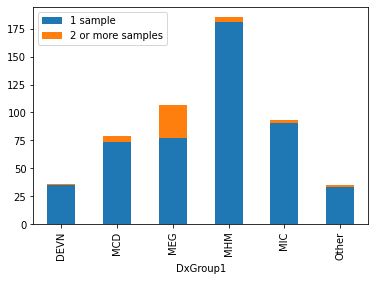

In [4]:
##then graph
sample_counts_per_ped.plot(kind='bar',stacked=True)
plt.savefig("proband_counts_per_dx.stacked_barchart.040521.pdf", bbox_inches="tight")

In [ ]:
##manually make ethnicity i.e. get column
ethnicity_info_file = 'ethnicity_per_ped_040521.txt'
eth = pd.read_csv(ethnicity_info_file, delimiter='\t')
sample_counts = eth.Ethnicity.str.split(',').str[0].value_counts()
sample_counts

In [ ]:
##seaborn alt bar chart
plt.title('ethnicity', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("ethnicity.barchart.040521.pdf", bbox_inches="tight")

In [ ]:
##manually make tissue types i.e. get proband_sample_type column and replace , with \n
gender_info_file = 'gender_040521.txt'
gi = pd.read_csv(gender_info_file, delimiter='\t')
sample_counts = gi.Gender.str.split(' ').str[0].value_counts()
si.head()
sample_counts

In [ ]:
##seaborn alt bar chart
plt.title('gender', fontsize =16)
sns.barplot(y=sample_counts.index, x=sample_counts, ci=None, orient='h', palette="colorblind" )
plt.savefig("gender.barchart.040521.pdf", bbox_inches="tight")

In [ ]:
##coverage boxplots 0421
cov_all_file = 'coverage_all_040721.txt'
ca = pd.read_csv(cov_all_file, delimiter='\t')
cov_brain_file = 'coverage_brain_peds_040721.txt'
cb = pd.read_csv(cov_brain_file, delimiter='\t')
cb.head()

In [ ]:
##all samples coverage ped type
plt.title('coverage ped type', fontsize =16)
sns.boxplot( x=ca["ped_type"], y=ca["coverage"], palette="colorblind")
plt.xticks(rotation=45)
plt.savefig("coverage.ped_type.boxplot.040721.pdf", bbox_inches="tight")

In [ ]:
##all samples coverage sample type
plt.title('coverage sample type', fontsize =16)
sns.boxplot( x=ca["sample_type"], y=ca["coverage"], palette="colorblind") 
plt.savefig("coverage.sample_type.boxplot.040721.pdf", bbox_inches="tight")

In [ ]:
##all samples coverage dx
plt.title('coverage dx', fontsize =16)
sns.boxplot( x=ca["dx"], y=ca["coverage"], palette="colorblind") 
plt.savefig("coverage.dx.boxplot.040721.pdf", bbox_inches="tight")

In [ ]:
##brain peds coverage ped type
plt.title('brain peds sample type', fontsize =16)
sns.boxplot( x=cb["sample_type_alt"], y=cb["coverage"], palette="colorblind") 
plt.savefig("coverage.sample_type_brain_peds.boxplot.040721.pdf", bbox_inches="tight")

## 0520 look at solved rates etc

In [7]:
##total solved 
solved_info_file = 'solved_all.txt'
solved_info = pd.read_csv(solved_info_file, delimiter='\t',index_col="summary")
solved_info.head()

,counts
summary,
Explanatory,98
Explanatory (by another method),13
Likely explanatory,80
Partially explanatory,13
Candidate gene,82


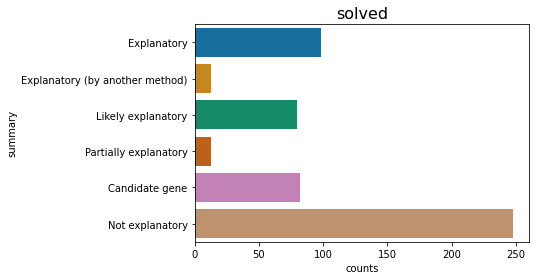

In [11]:
##seaborn alt bar chart
plt.title('solved', fontsize =16)
sns.barplot(y=solved_info.index, x=solved_info["counts"], orient='h', palette="colorblind" )
plt.savefig("solved_all.barchart.051321.pdf", bbox_inches="tight")

In [14]:
##features solved 
solved_info_file = 'solved_features.txt'
solved_info = pd.read_csv(solved_info_file, delimiter='\t',index_col="summary")
solved_info.head()

,Explanatory,Explanatory (by another method),Likely explanatory,Partially explanatory,Candidate gene,Not explanatory
summary,,,,,,
CTX,50,6,37,5,47,128
CBL,53,9,43,6,35,122
BS,22,4,19,5,14,47
BG-TH,8,0,8,1,10,20
CC,42,9,39,5,32,106


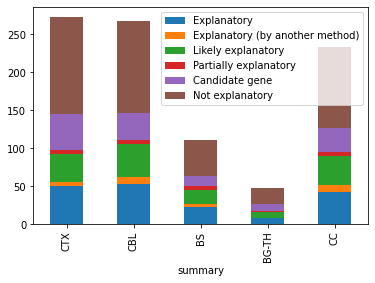

In [18]:
##then graph
solved_info.plot(kind='bar',stacked=True)
plt.savefig("solved_features.barchart.051321.pdf", bbox_inches="tight")

In [19]:
##head size solved 
solved_info_file = 'solved_head_size.txt'
solved_info = pd.read_csv(solved_info_file, delimiter='\t',index_col="summary")
solved_info.head()

,Explanatory,Explanatory (by another method),Likely explanatory,Partially explanatory,Candidate gene,Not explanatory
summary,,,,,,
NL,32,4,17,5,19,79
MAC,18,5,14,2,13,25
MIC,21,2,26,2,26,57


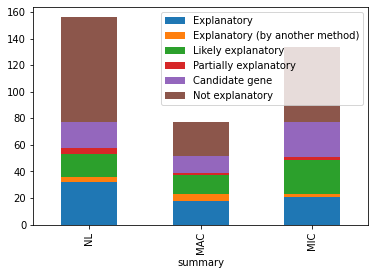

In [20]:
##then graph
solved_info.plot(kind='bar',stacked=True)
plt.savefig("solved_head_size.barchart.051321.pdf", bbox_inches="tight")

In [21]:
##head size solved 
solved_info_file = 'solved_feature_count.txt'
solved_info = pd.read_csv(solved_info_file, delimiter='\t',index_col="summary")
solved_info.head()

,Explanatory,Explanatory (by another method),Likely explanatory,Partially explanatory,Candidate gene,Not explanatory
summary,,,,,,
0,22,1,19,3,21,54
1,23,2,21,4,22,64
2,25,6,14,3,16,66
3,15,2,12,1,12,39
4,8,2,9,1,7,15


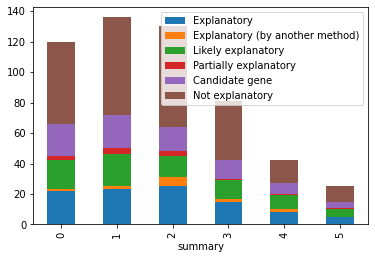

In [22]:
##then graph
solved_info.plot(kind='bar',stacked=True)
plt.savefig("solved_feature_counts.barchart.051321.pdf", bbox_inches="tight")

In [25]:
##dx1 solved 
solved_info_file = 'solved_dx1.txt'
solved_info = pd.read_csv(solved_info_file, delimiter='\t',index_col="summary")
solved_info.head()

,Explanatory,Explanatory (by another method),Likely explanatory,Partially explanatory,Candidate gene,Not explanatory
summary,,,,,,
MHM,30,8,24,6,24,93
Other,7,0,8,0,5,15
MEG,18,2,15,3,18,51
MCD,21,1,7,2,10,38
MIC,18,2,19,2,18,33


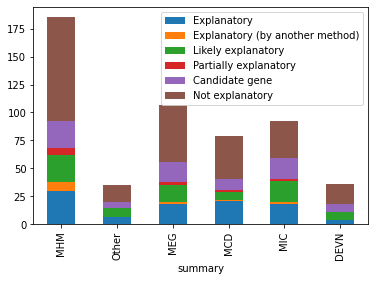

In [26]:
##then graph
solved_info.plot(kind='bar',stacked=True)
plt.savefig("solved_dx1.barchart.051321.pdf", bbox_inches="tight")